# Part 1) Load the data and make a datetime index.


In [1]:
## Preliminary Steps
# Importing libraries
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
# changing default figsize
plt.rcParams['figure.figsize']=[12,3]
# loading in data
df=pd.read_csv('/Users/oliver/Desktop/datasets/london_weather_MODIFIED - london_weather_MODIFIED.csv')
# creating datetime column
df['date']=pd.to_datetime(df['date'],format='%Y%m%d')
# setting as index
df=df.set_index('date')
display(df.info(),df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15341 entries, 1979-01-01 to 2020-12-31
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       14938 non-null  float64
 1   sunshine          14957 non-null  float64
 2   global_radiation  14939 non-null  float64
 3   max_temp          14951 non-null  float64
 4   mean_temp         14922 non-null  float64
 5   min_temp          14955 non-null  float64
 6   precipitation     14951 non-null  float64
 7   pressure          14953 non-null  float64
 8   snow_depth        13589 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


None

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [2]:
## filtering out required data
# keeping data from year 2000 and later
ts=df.loc['2000':'2020']
# keeping only select features
ts=ts[['precipitation','mean_temp','min_temp','max_temp','snow_depth']]
# previewing
display(ts.info(),ts.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  7281 non-null   float64
 1   mean_temp      7252 non-null   float64
 2   min_temp       7285 non-null   float64
 3   max_temp       7281 non-null   float64
 4   snow_depth     5919 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


None

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


In [3]:
# locating missing values
ts.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [4]:
## Filling in missing values
# temp cols
ts=ts.interpolate(column=['mean_temp','min_temp','max_temp'])
# percipitation & snow
ts['precipitation']=ts['precipitation'].fillna(0)
ts['snow_depth']=ts['snow_depth'].fillna(0)
# rechecking nans
ts.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)


    Q1: What month had the most precipitation between 2000 through 2010?

Resample the data as Monthly frequency.

Find the date and corresponding value for the max precipitation.

Plot the feature and time period that corresponds to the question.

Make sure to meet the "Visualization Requirements" below!

Determine the date and value for the most precipitation (the max precipitation).

Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.

Make sure to add a legend so that your label is visible.


In [5]:
# slicing out precipitation during 2000 to 2010
ts_res=ts.loc['2000':'2010',['precipitation']]
ts_res

,precipitation
date,
2000-01-01,0.0
2000-01-02,0.2
2000-01-03,6.0
2000-01-04,0.2
2000-01-05,0.8
...,...
2010-12-27,5.0
2010-12-28,0.4
2010-12-29,1.4


In [6]:
# resampling with monthly frequency
ts_res=ts_res.resample('MS').mean()
ts_res

,precipitation
date,
2000-01-01,0.467742
2000-02-01,2.234483
2000-03-01,0.448387
2000-04-01,2.750000
2000-05-01,2.516129
...,...
2010-08-01,2.980645
2010-09-01,1.486667
2010-10-01,2.035484


In [7]:
# finding date with max precipitation
max_precip_date=ts_res['precipitation'].idxmax()
max_precip_date

Timestamp('2000-10-01 00:00:00', freq='MS')

In [8]:
# finding value using date
ts_res.loc[max_precip_date]


precipitation    4.925806
Name: 2000-10-01 00:00:00, dtype: float64

October 1st of 2000 had the highest value between 2000 to 2010 with a value of 4.92.

In [9]:
## creating locators:
# 3 month locator
month_loc=mdates.MonthLocator(interval=3)
# yearly locator
year_loc=mdates.YearLocator(1)
# yearly formator
year_fmt=mdates.DateFormatter('%Y')

In [10]:
max_precip_date

Timestamp('2000-10-01 00:00:00', freq='MS')

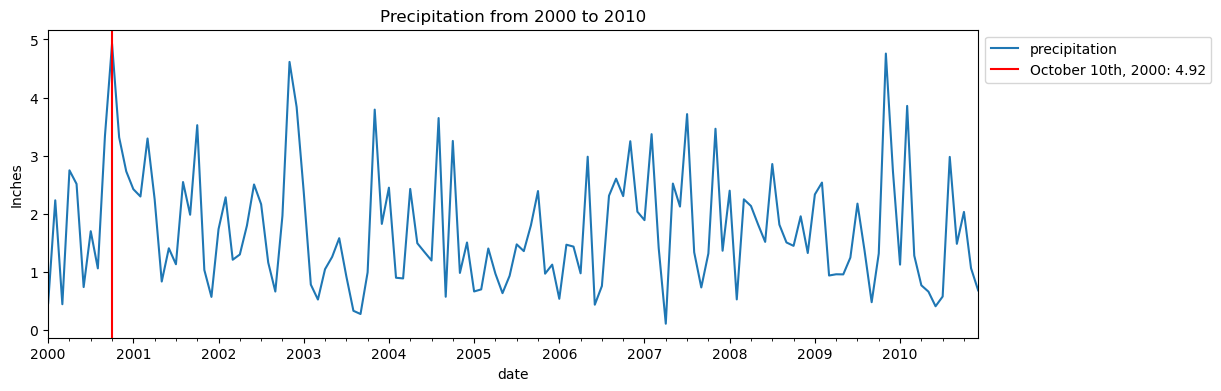

In [11]:
## Ploting
fig,ax=plt.subplots(figsize=[12,4])
ts_res.plot(ax=ax)
plt.title('Precipitation from 2000 to 2010')
plt.ylabel('Inches')
plt.axvline(x = max_precip_date, color = 'r', label='October 10th, 2000: 4.92')
plt.legend(bbox_to_anchor = (1, 1), loc = 'upper left');

    Q2: Which year between 2000-2020 had the coolest average temperature?
Resample the data as Yearly frequency.

Plot the feature and time period that corresponds to the question.
Make sure to meet the "Visualization Requirements" below!
Determine the date and value for the lowest mean temp.
Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.


In [12]:
# resampling ts with a yearly frequency
ts_res=ts.resample('Y').mean()
# slicing out years with temp column
ts_res=ts_res.loc['2000':'2020',['mean_temp']]
ts_res.head()

,mean_temp
date,
2000-12-31,11.575683
2001-12-31,11.331507
2002-12-31,12.084247
2003-12-31,12.114521
2004-12-31,11.900683


In [13]:
# finding year with coolest (minimum) average temp
cool_mean_temp=ts_res['mean_temp'].idxmin()
cool_mean_temp

Timestamp('2010-12-31 00:00:00', freq='A-DEC')

In [14]:
# finding value
ts_res.loc[cool_mean_temp] 

mean_temp    10.657397
Name: 2010-12-31 00:00:00, dtype: float64

The year with the coolest average temperature between 2000 and 2020 was 2010 with a value of 10.65.

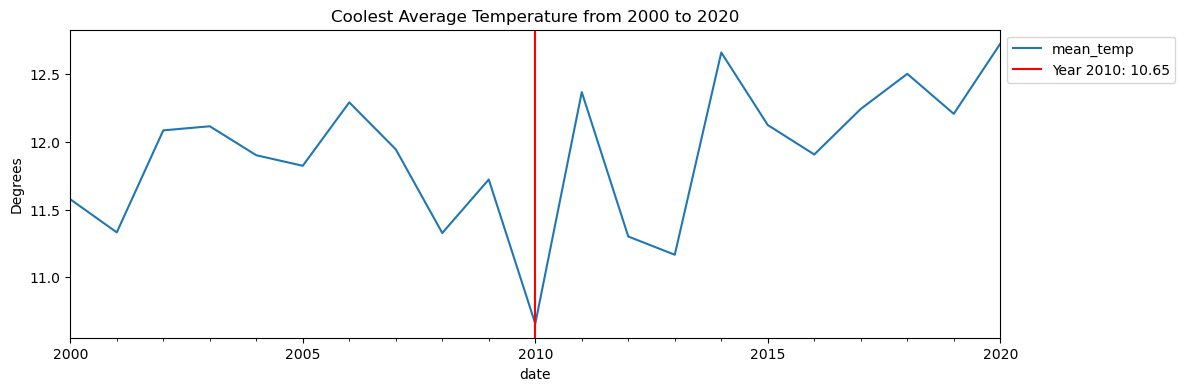

In [15]:
## Plotting
## Ploting
fig,ax=plt.subplots(figsize=[12,4])
ts_res.plot(ax=ax)
plt.title('Coolest Average Temperature from 2000 to 2020')
plt.ylabel('Degrees')
plt.axvline(x = cool_mean_temp, color = 'r', label='Year 2010: 10.65')
plt.legend(bbox_to_anchor = (1, 1), loc = 'upper left');